In [3]:
import numpy as np
from math import pi, sqrt, tanh, asin
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact
from os import path

import plotly.graph_objects as go
import pandas as pd

from quimb import *
import time


In [3]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
        
    return states

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U

def vNent_calc(rho,epsilon=1e-9):
    chi0 =np.linalg.eigvalsh(rho)
    chi1=chi0[np.nonzero(np.abs(chi0)>epsilon)]
    chi2=chi1[np.nonzero(np.abs(chi1-1)>epsilon)]
    return -np.sum(chi2*np.log(chi2))


In [99]:
Nrep=100
r=2 # local Hilbert space dim

L=16
Lab_sw=np.arange(2,L+1)
# La_sw=np.arange(1,int(L/2)+1)
# La_sw= [1] # range(1,6) 

dims = [r] * L
N = prod(dims)

s_abc=Hilbertspace_Zr(L,r)

Ne_abc = r**(L-1)

t_timer=time.time()

neg_symm=np.zeros((len(Lab_sw),Nrep))
neg_full=np.zeros((len(Lab_sw),Nrep))
# np.random.seed(1)

for i_l in range(len(Lab_sw)):
    
    Lb=int(Lab_sw[i_l]/2)
    La=Lab_sw[i_l]-Lb
    Lc=L-La-Lb
    print('Lab: ',La+Lb)
    
    Na=r**La
    Nb=r**Lb
    dims_ab = [r] * (La+Lb)
    Nc=r**Lc
    
    if Lc>0:
        Ne_ab = r**(L-2)
    else:
        Ne_ab = r**(L-1)

    i_abc=np.zeros((Ne_abc,r),dtype=int)
    i_c=np.zeros((Ne_ab,r),dtype=int)
    ### indices of r multiples
    for i_Zr in range(r):
        if Lc>0:
            i_abc[:,i_Zr]=np.argwhere(np.mod(np.sum(s_abc[:,:(La+Lb)],axis=1),r)==i_Zr)[:,0]
            i_v=np.argwhere(np.mod(np.sum(s_abc[i_abc[:,i_Zr],(La+Lb):],axis=1),r)==i_Zr)[:,0]
            i_c[:,i_Zr]=i_abc[i_v,i_Zr]
        else:
            i_c[:,i_Zr]=np.argwhere(np.mod(np.sum(s_abc,axis=1),r)==i_Zr)[:,0]

    for i_r in range(Nrep):        
        psi = rand_ket(N)
        neg_full[i_l,i_r]=logneg_subsys_approx(psi, dims=dims, sysa=np.arange(Lc,Lc+La), sysb=np.arange(Lc+La,L))

        vec=np.random.randn(Ne_ab)+ 1j*np.random.randn(Ne_ab)
        psi = np.zeros(N, dtype=np.complex128)
        psi[i_c[:,0]]=vec/np.linalg.norm(vec)

        neg_symm[i_l,i_r]=logneg_subsys_approx(psi, dims=dims, sysa=np.arange(Lc,Lc+La), sysb=np.arange(Lc+La,L))
    
    print('Nrep:', i_r)


elapsed = time.time() - t_timer
print("Finished, quimb elapsed time = %.2f " % (elapsed)+ "sec")



Lab:  2
Nrep: 99
Lab:  3
Nrep: 99
Lab:  4
Nrep: 99
Lab:  5
Nrep: 99
Lab:  6
Nrep: 99
Lab:  7
Nrep: 99
Lab:  8
Nrep: 99
Lab:  9
Nrep: 99
Lab:  10
Nrep: 99
Lab:  11
Nrep: 99
Lab:  12
Nrep: 99
Lab:  13
Nrep: 99
Lab:  14
Nrep: 99
Lab:  15
Nrep: 99
Lab:  16
Nrep: 99
Finished, quimb elapsed time = 1106.21 sec


/tmp/yes/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning:

Casting complex values to real discards the imaginary part

/tmp/yes/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning:

Casting complex values to real discards the imaginary part



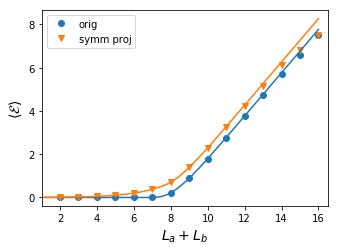

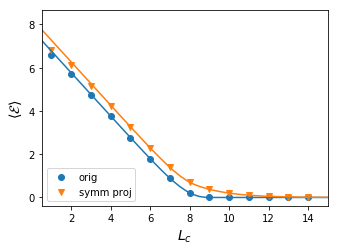

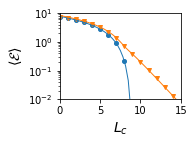

In [126]:
def fa(xs):
    ys= np.zeros(xs.shape)
    for i_x in range(len(xs)):
        x= xs[i_x]
        if x>1:
            ys[i_x]= np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5 )
        else:
            ys[i_x]= 0
    return ys

def fa_symm(xs,r):
    ys= np.zeros(xs.shape)
    for i_x in range(len(xs)):
        x= xs[i_x]
        if x>1:
            ys[i_x]= np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5+\
                       4*(r-1)/(3*pi)*x )
        else:
            ys[i_x]= np.log2(1+4*(r-1)/(3*pi)*x )
    return ys

Lmin=0
Lab_ft=np.linspace(Lmin,L)
at=2*r**(Lab_ft-L/2)
yt=np.real(fa(at))

at_symm=at/sqrt(r)
yt_symm=np.real(fa_symm(at_symm,r))


neg_full_avg=np.mean(neg_full,axis=1)
neg_symm_avg=np.mean(neg_symm,axis=1)

fsize=14
plt.figure(figsize=(4.8,3.6))
plt.plot(Lab_sw,neg_full_avg,'o',color='C0',label='orig')
plt.plot(Lab_sw,neg_symm_avg,'v',color='C1',label='symm proj')
plt.plot(Lab_ft,fa(at),color='C0')
plt.plot(Lab_ft,yt_symm,color='C1')
plt.legend()
plt.xlim(1,16.5)
plt.xlabel(r'$L_a+L_b$',fontsize=fsize)
plt.ylabel(r'$\langle {\cal E} \rangle$',fontsize=fsize)
plt.tight_layout()
plt.savefig('figs/NS_vs_Lab_r_%d_L_%d_symm.pdf' % (r,L))
plt.show()

plt.figure(figsize=(4.8,3.6))
plt.plot(L-Lab_sw,neg_full_avg,'o',color='C0',label='orig')
plt.plot(L-Lab_sw,neg_symm_avg,'v',color='C1',label='symm proj')
plt.plot(L-Lab_ft,yt,color='C0')
plt.plot(L-Lab_ft,yt_symm,color='C1')
plt.legend(loc='lower left')
plt.xlim(0.5,15)
plt.xlabel(r'$L_c$',fontsize=fsize)
plt.ylabel(r'$\langle {\cal E} \rangle$',fontsize=fsize)
plt.tight_layout()
plt.savefig('figs/NS_vs_Lc_r_%d_L_%d_symm.pdf' % (r,L))
plt.show()

plt.figure(figsize=(2.8,2.1))
msize=4
plt.semilogy(L-Lab_sw[int(L/2)-2:],neg_full_avg[int(L/2)-2:],'o',markersize=msize,color='C0',label='orig')
plt.semilogy(L-Lab_sw,neg_symm_avg,'v',markersize=msize,color='C1',label='symm proj')
lw=1
plt.semilogy(L-Lab_ft,yt,color='C0',linewidth=lw)
plt.semilogy(L-Lab_ft,yt_symm,color='C1',linewidth=lw)
# plt.legend()
plt.xlim(0,15)
plt.ylim(0.01,10)
plt.xlabel(r'$L_c$',fontsize=fsize)
plt.ylabel(r'$\langle {\cal E} \rangle$',fontsize=fsize)
plt.tight_layout()
plt.savefig('figs/NSlog_vs_Lc_r_%d_L_%d_symm.pdf' % (r,L))
plt.show()



/tmp/yes/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning:

Casting complex values to real discards the imaginary part

/tmp/yes/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning:

Casting complex values to real discards the imaginary part



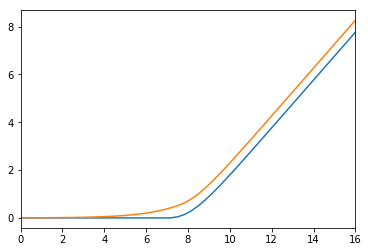

In [84]:
def fa(xs):
#     return np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5)
    ys= np.zeros(xs.shape)
    for i_x in range(len(xs)):
        x= xs[i_x]
        if x>1:
            ys[i_x]= np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5 )
        else:
            ys[i_x]= 0
    return ys

def fa_symm(xs,r):
#     return np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5+\
#                        4*(r-1)/(3*pi)*x )
    ys= np.zeros(xs.shape)
    for i_x in range(len(xs)):
        x= xs[i_x]
        if x>1:
            ys[i_x]= np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5+\
                       4*(r-1)/(3*pi)*x )
        else:
            ys[i_x]= np.log2(1+4*(r-1)/(3*pi)*x )
    return ys

# r=3
# L=12
# Lmin=L/2 - np.log2(r)
Lmin=0
Lab_ft=np.linspace(Lmin,L)
at=2*r**(Lab_ft-L/2)
yt=np.real(fa(at))

at_symm=at/sqrt(r)
yt_symm=np.real(fa_symm(at_symm,r))

# print(yt)
# print(.shape)
plt.plot(Lab,yt)
plt.plot(Lab,yt_symm)
plt.xlim(0,L)
plt.show()

No. of reps:  1


/tmp/yes/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning:

Casting complex values to real discards the imaginary part

/tmp/yes/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning:

Casting complex values to real discards the imaginary part



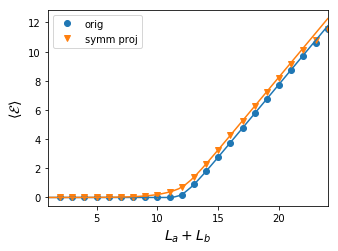

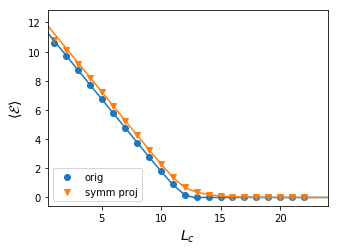

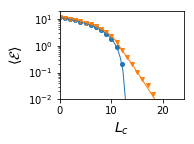

In [10]:
def fa(xs):
    ys= np.zeros(xs.shape)
    for i_x in range(len(xs)):
        x= xs[i_x]
        if x>1:
            ys[i_x]= np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5 )
        else:
            ys[i_x]= 0
    return ys

def fa_symm(xs,r):
    ys= np.zeros(xs.shape)
    for i_x in range(len(xs)):
        x= xs[i_x]
        if x>1:
            ys[i_x]= np.log2(2/pi* np.arcsin(1/x)+2/(3*pi*x)*(1+2*x**2)* (1-1/x**2 +0.0j)**0.5+\
                       4*(r-1)/(3*pi)*x )
        else:
            ys[i_x]= np.log2(1+4*(r-1)/(3*pi)*x )
    return ys


r=2 # local Hilbert space dim
L=24

f1= 'LN_r_%d_L_%d.npz' % (r,L)
out_dir = 'data/' 
fname = out_dir+f1
npzfile = np.load(fname)
print('No. of reps: ', npzfile['Nrep'])
neg_symm=npzfile['neg_symm']
neg_full=npzfile['neg_full']
Lab_sw=npzfile['Lab_sw']

Lmin=0
Lab_ft=np.linspace(Lmin,L)
at=2*r**(Lab_ft-L/2)
yt=np.real(fa(at))

at_symm=at/sqrt(r)
yt_symm=np.real(fa_symm(at_symm,r))


neg_full_avg=np.mean(neg_full,axis=1)
neg_symm_avg=np.mean(neg_symm,axis=1)

fsize=14
plt.figure(figsize=(4.8,3.6))
plt.plot(Lab_sw,neg_full_avg,'o',color='C0',label='orig')
plt.plot(Lab_sw,neg_symm_avg,'v',color='C1',label='symm proj')
plt.plot(Lab_ft,fa(at),color='C0')
plt.plot(Lab_ft,yt_symm,color='C1')
plt.legend()
plt.xlim(1,L)
plt.xlabel(r'$L_a+L_b$',fontsize=fsize)
plt.ylabel(r'$\langle {\cal E} \rangle$',fontsize=fsize)
plt.tight_layout()
plt.savefig('figs/NS_vs_Lab_r_%d_L_%d_symm.pdf' % (r,L))
plt.show()

plt.figure(figsize=(4.8,3.6))
plt.plot(L-Lab_sw,neg_full_avg,'o',color='C0',label='orig')
plt.plot(L-Lab_sw,neg_symm_avg,'v',color='C1',label='symm proj')
plt.plot(L-Lab_ft,yt,color='C0')
plt.plot(L-Lab_ft,yt_symm,color='C1')
plt.legend(loc='lower left')
plt.xlim(0.5,L)
plt.xlabel(r'$L_c$',fontsize=fsize)
plt.ylabel(r'$\langle {\cal E} \rangle$',fontsize=fsize)
plt.tight_layout()
plt.savefig('figs/NS_vs_Lc_r_%d_L_%d_symm.pdf' % (r,L))
plt.show()

plt.figure(figsize=(2.8,2.1))
msize=4
plt.semilogy(L-Lab_sw[int(L/2)-2:],neg_full_avg[int(L/2)-2:],'o',markersize=msize,color='C0',label='orig')
plt.semilogy(L-Lab_sw,neg_symm_avg,'v',markersize=msize,color='C1',label='symm proj')
lw=1
plt.semilogy(L-Lab_ft,yt,color='C0',linewidth=lw)
plt.semilogy(L-Lab_ft,yt_symm,color='C1',linewidth=lw)
# plt.legend()
plt.xlim(0,L)
plt.ylim(0.01,20)
plt.xlabel(r'$L_c$',fontsize=fsize)
plt.ylabel(r'$\langle {\cal E} \rangle$',fontsize=fsize)
plt.tight_layout()
plt.savefig('figs/NSlog_vs_Lc_r_%d_L_%d_symm.pdf' % (r,L))
plt.show()
